# **Menggunakan Model untuk Melakukan Prediksi**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
xs = np.array([1.0,  2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([4.0, 6.0, 8.0, 10.0, 12.0, 14.0], dtype=float)

In [ ]:
model=tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
model.fit(xs, ys, epochs=150)

Epoch 1/150
1/1 [==============================] - 0s 454ms/step - loss: 153.9934
Epoch 2/150
1/1 [==============================] - 0s 10ms/step - loss: 71.4437
Epoch 3/150
1/1 [==============================] - 0s 11ms/step - loss: 33.2360
Epoch 4/150
1/1 [==============================] - 0s 10ms/step - loss: 15.5510
Epoch 5/150
1/1 [==============================] - 0s 11ms/step - loss: 7.3647
Epoch 6/150
1/1 [==============================] - 0s 8ms/step - loss: 3.5746
Epoch 7/150
1/1 [==============================] - 0s 10ms/step - loss: 1.8192
Epoch 8/150
1/1 [==============================] - 0s 9ms/step - loss: 1.0056
Epoch 9/150
1/1 [==============================] - 0s 11ms/step - loss: 0.6278
Epoch 10/150
1/1 [==============================] - 0s 11ms/step - loss: 0.4518
Epoch 11/150
1/1 [==============================] - 0s 8ms/step - loss: 0.3691
Epoch 12/150
1/1 [==============================] - 0s 5ms/step - loss: 0.3297
Epoch 13/150
1/1 [=============================

In [ ]:
print(model.predict([10.0]))

[[22.999418]]


# **Model Sekuensial dengan Beberapa Layer**

In [ ]:
model = tf.keras.Sequential([
                             keras.layers.Dense(units=1, input_shape=[1]),
                             keras.layers.Dense(units=8),
                             keras.layers.Dense(units=1)])

# **Membuat Model untuk Klasifikasi Dua Kelas**

In [ ]:
import pandas as pd
df = pd.read_csv('drive/MyDrive/Dicoding/BPML/citrus.csv')

In [ ]:
df.info

<bound method DataFrame.info of             name  diameter  weight  red  green  blue
0         orange      2.96   86.76  172     85     2
1         orange      3.91   88.05  166     78     3
2         orange      4.42   95.17  156     81     2
3         orange      4.47   95.60  163     81     4
4         orange      4.48   95.76  161     72     9
...          ...       ...     ...  ...    ...   ...
9995  grapefruit     15.35  253.89  149     77    20
9996  grapefruit     15.41  254.67  148     68     7
9997  grapefruit     15.59  256.50  168     82    20
9998  grapefruit     15.92  260.14  142     72    11
9999  grapefruit     16.45  261.51  152     74     2

[10000 rows x 6 columns]>

In [ ]:
df.name[df.name == 'orange'] = 0
df.name[df.name == 'grapefruit'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset = df.values

In [ ]:
# pilih 5 kolom terakhir sebagai atribut
X = dataset[:,1:6]
# bilangan sebelum koma untuk memilih baris pada dataframe
# bilangan setelah koma untuk memilih kolom pada dataframe

In [ ]:
# memisahkan label dari dataset
y = dataset[:,0] 

In [ ]:
# Normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
import numpy as np
 
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape = (5, )),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.6462 - accuracy: 0.7794
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.8716
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.9041
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.9163
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.9214
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.9236
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9264
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9267
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9269
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 0.1941 - accura

In [ ]:
model.evaluate(X_test, Y_test)
# elemen pertama adalah loss dan elemen kedua adalah akurasi

# **Membuat dan Melatih Model untuk Klasifikasi Banyak Kelas**

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv('drive/MyDrive/Dicoding/BPML/Iris.csv')
df

In [ ]:
df = df.drop(columns='Id')

In [ ]:
category = pd.get_dummies(df.Species)
category

In [ ]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

In [ ]:
dataset = new_df.values
dataset

In [ ]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [ ]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax'),])

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1242 - accuracy: 0.1619
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0902 - accuracy: 0.2190
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0614 - accuracy: 0.3429
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0377 - accuracy: 0.3429
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0156 - accuracy: 0.3429
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9937 - accuracy: 0.3619
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9705 - accuracy: 0.4762
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9460 - accuracy: 0.5810
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9213 - accuracy: 0.6381
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8952 - accuracy: 0.6381
Epoch 11/100
4/4 [===========

In [ ]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.1287 - accuracy: 0.9333


[0.12865136563777924, 0.9333333373069763]

# **Plot Loss dan Akurasi dari Trained Model**

In [ ]:
import matplotlib.pyplot as plt

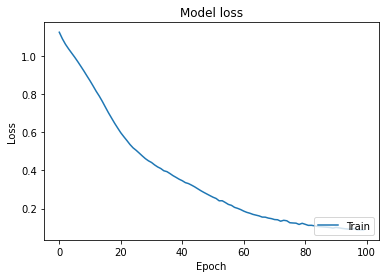

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

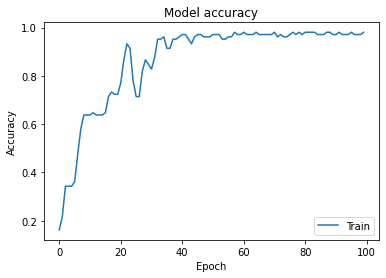

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

# **Mencegah Overfitting dengan Dropout**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

# **Penggunaan Callbacks**

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv('drive/MyDrive/Dicoding/BPML/Iris.csv')
df

In [ ]:
df = df.drop(columns='Id')
df

In [ ]:
category = pd.get_dummies(df['Species'])
category

In [ ]:
new_df = pd.concat([df, category], axis = 1)
df

In [ ]:
new_df = new_df.drop(columns='Species')
new_df

In [ ]:
dataset = new_df.values
dataset

In [ ]:
X = dataset[:,0:4]
Y = dataset[:,4:7]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
X_scale = min_max_scaler.fit_transform(X)
X_scale

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size = 0.3, random_state=0)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

# **Menggunakan Dataset dari tf.data.datasets**

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(gambar_latih[0])
print(label_latih[0])

In [ ]:
gambar_latih = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(gambar_latih, label_latih, epochs=5)

# **Penggunaan Batch Loading**

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, batch_size=32, epochs=5)

In [ ]:
model.fit(training_images, training_labels, batch_size=256, epochs=5)